In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



titanic_data = pd.read_csv("titanic.csv")


titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Ans 1

# Filter passengers with no siblings or spouses onboard
no_sibsp = titanic_data[titanic_data['SibSp'] == 0]

# Calculate survival rate
no_sibsp_survival_rate = no_sibsp['Survived'].mean()
print(f"Survival rate for passengers with no siblings/spouses onboard: {no_sibsp_survival_rate:.2%}")


Survival rate for passengers with no siblings/spouses onboard: 34.54%


In [3]:
#Ans 2

# Filter second-class survivors
second_class_survivors = titanic_data[(titanic_data['Pclass'] == 2) & (titanic_data['Survived'] == 1)]

# Calculate average fare
average_fare_second_class_survivors = second_class_survivors['Fare'].mean()
print(f"Average fare for survivors in the second class: ${average_fare_second_class_survivors:.2f}")


Average fare for survivors in the second class: $22.06


<ipython-input-4-f2438079cacc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TravelAlone', y='Age', data=titanic_data, palette='muted')


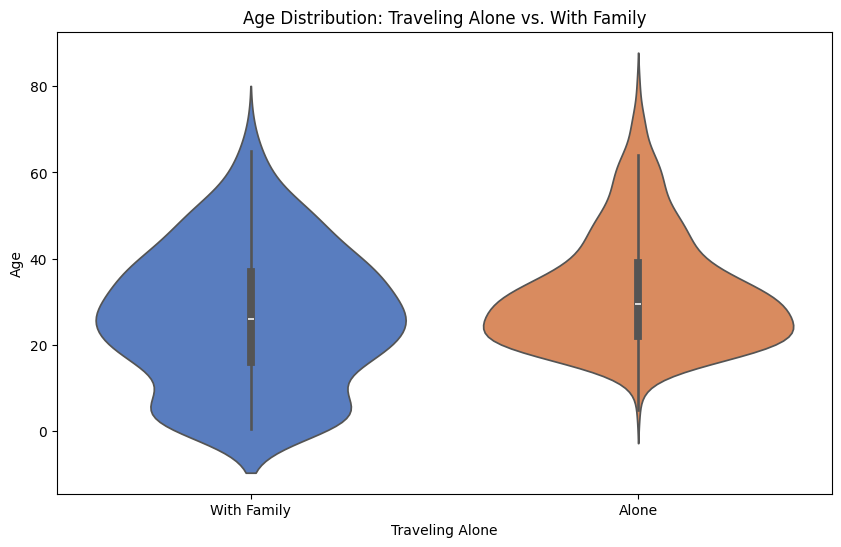

In [4]:
#Ans 3

# Add a column to indicate if the passenger traveled alone
titanic_data['TravelAlone'] = (titanic_data['SibSp'] + titanic_data['Parch'] == 0)

# Create a violin plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='TravelAlone', y='Age', data=titanic_data, palette='muted')
plt.title('Age Distribution: Traveling Alone vs. With Family')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.ylabel('Age')
plt.xlabel('Traveling Alone')
plt.show()


In [5]:
#Ans 4

# Filter passengers below age 18
under_18 = titanic_data[titanic_data['Age'] < 18]

# Calculate survival rate
under_18_survival_rate = under_18['Survived'].mean()
print(f"Proportion of passengers aged below 18 who survived: {under_18_survival_rate:.2%}")


Proportion of passengers aged below 18 who survived: 53.98%


In [6]:
#Ans 5

# Calculate the correlation
fare_survived_correlation = titanic_data[['Fare', 'Survived']].corr().loc['Fare', 'Survived']
print(f"Correlation between fare and survival: {fare_survived_correlation:.2f}")


Correlation between fare and survival: 0.26


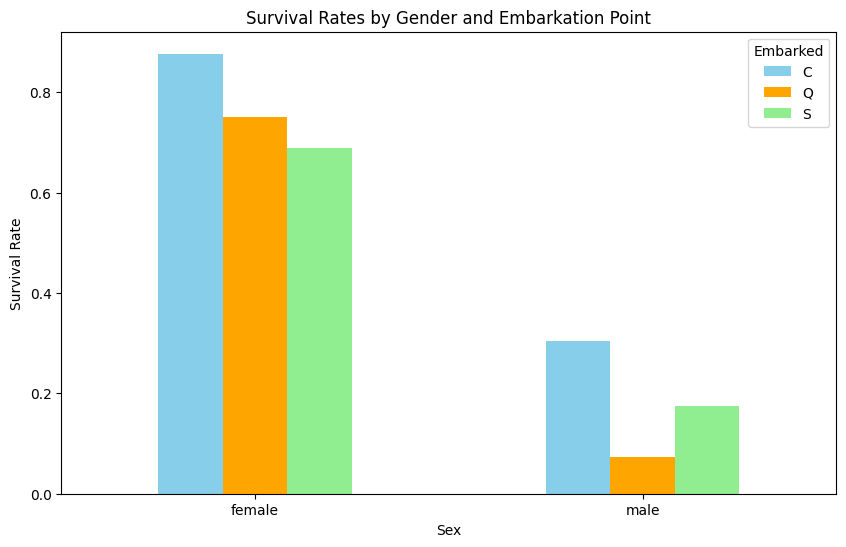

In [7]:
#Ans 6

# Group by gender and embarkation point, and calculate survival rates
survival_by_gender_embarked = titanic_data.groupby(['Sex', 'Embarked'])['Survived'].mean().unstack()

# Plot a grouped bar chart
survival_by_gender_embarked.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Survival Rates by Gender and Embarkation Point')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Embarked')
plt.show()
